In [ ]:
# This script combines training and testing datasets into a single CSV file
import pandas as pd
train_file = "Cleaned_Google_Stock_Price_Train.csv"
test_file = "Cleaned_Google_Stock_Price_Test.csv"
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
combined_data = pd.concat([train_data, test_data], ignore_index=True)
output_file = "Google_Stock_Price_Combined.csv"
combined_data.to_csv(output_file, index=False)


In [ ]:
# This script analyzes a dataset for structure, missing values, and anomalies
import pandas as pd
file_path = "Google_Stock_Price_Combined.csv"
data = pd.read_csv(file_path)
print("Dataset Information:")
print(data.info())
print("\nDataset Preview:")
print(data.head())
print("\nMissing Values Check:")
missing_values = data.isnull().sum()
print(missing_values)
print("\nFully Missing Columns Check:")
print(missing_values[missing_values == len(data)])
print("\nStatistical Summary:")
print(data.describe())
print("\nAnomaly Check:")
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{col} anomalies (negative or out-of-range values):")
    negative_values = data[data[col] < 0]
    if not negative_values.empty:
        print(negative_values)
    else:
        print("No negative anomalies.")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1844 non-null   object 
 1   Open    1844 non-null   float64
 2   High    1844 non-null   float64
 3   Low     1844 non-null   float64
 4   Close   1844 non-null   float64
 5   Volume  1844 non-null   float64
dtypes: float64(5), object(1)
memory usage: 86.6+ KB
None

Dataset Preview:
         Date    Open      High      Low     Close     Volume
0  2012-01-03  325.25  332.8300  324.970  663.5900  7380500.0
1  2012-01-04  331.27  333.8700  329.080  666.4500  5749400.0
2  2012-01-05  329.83  330.7500  326.890  657.2100  6590300.0
3  2012-01-06  328.34  328.7700  323.680  648.2400  5405900.0
4  2012-01-07  324.68  325.5075  319.585  641.5375  6260425.0

Missing Values Check:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Fully Missing Column

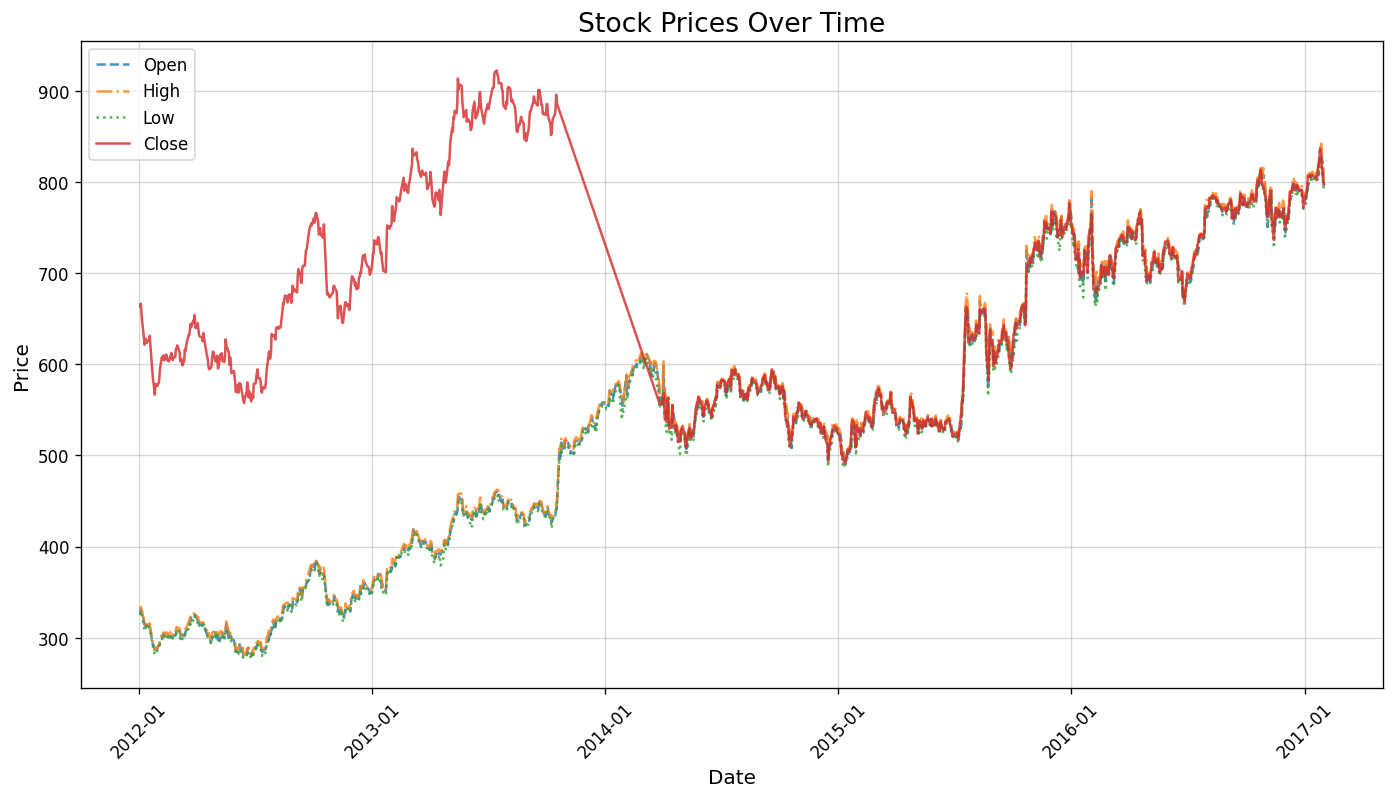

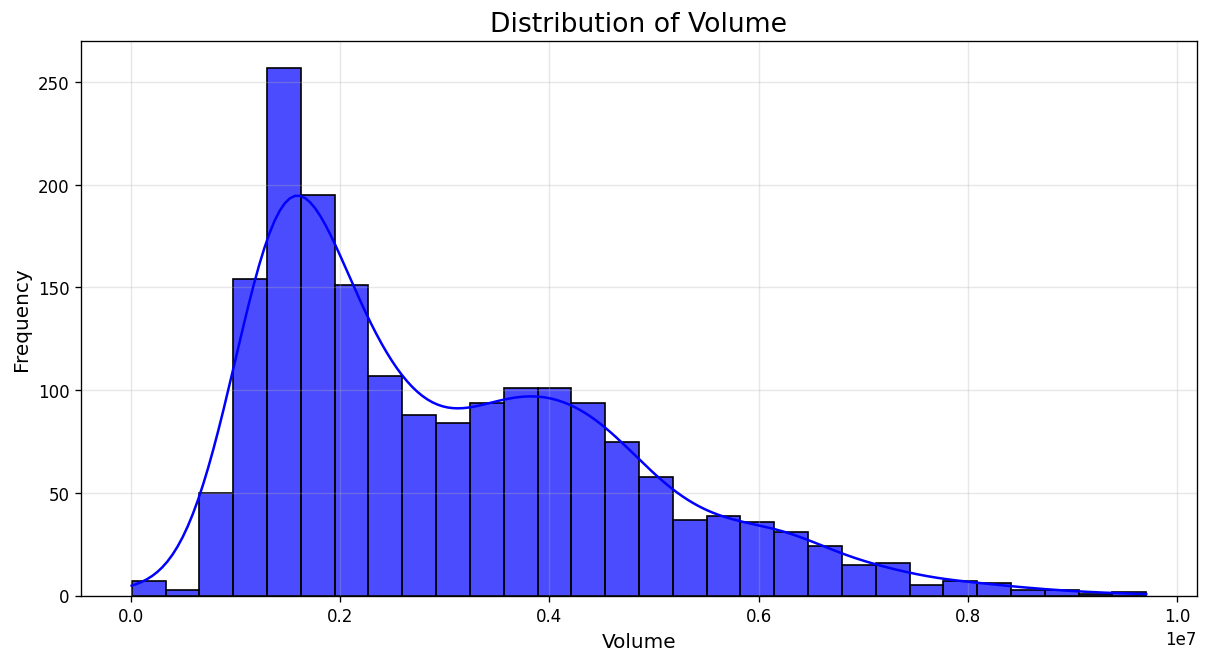

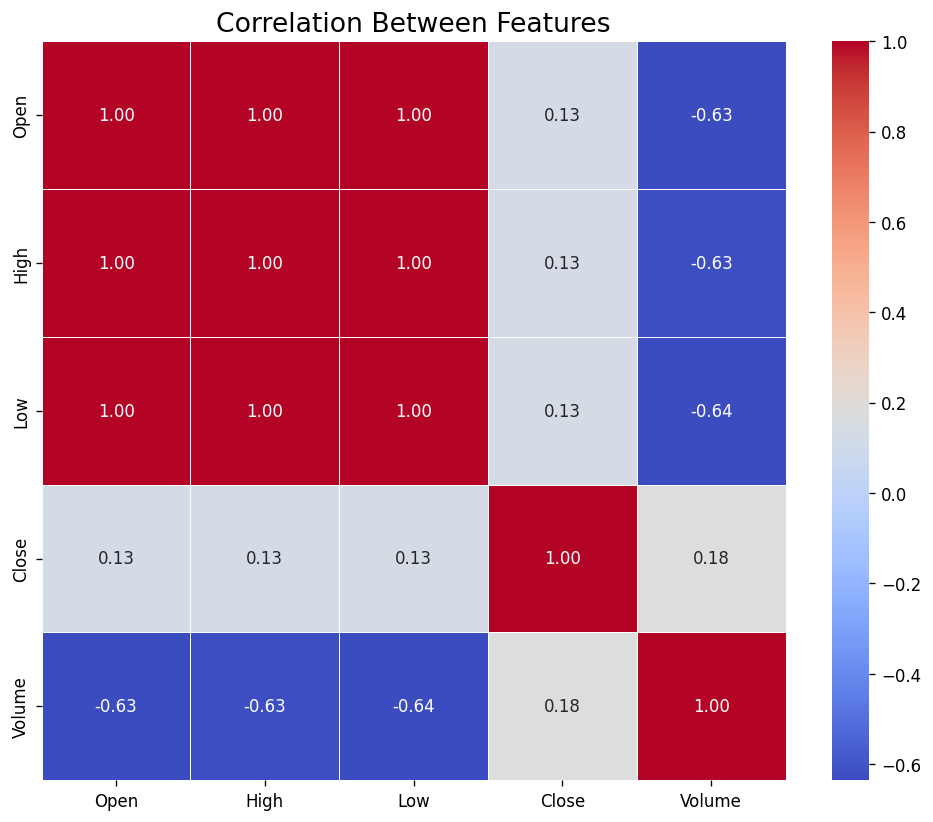

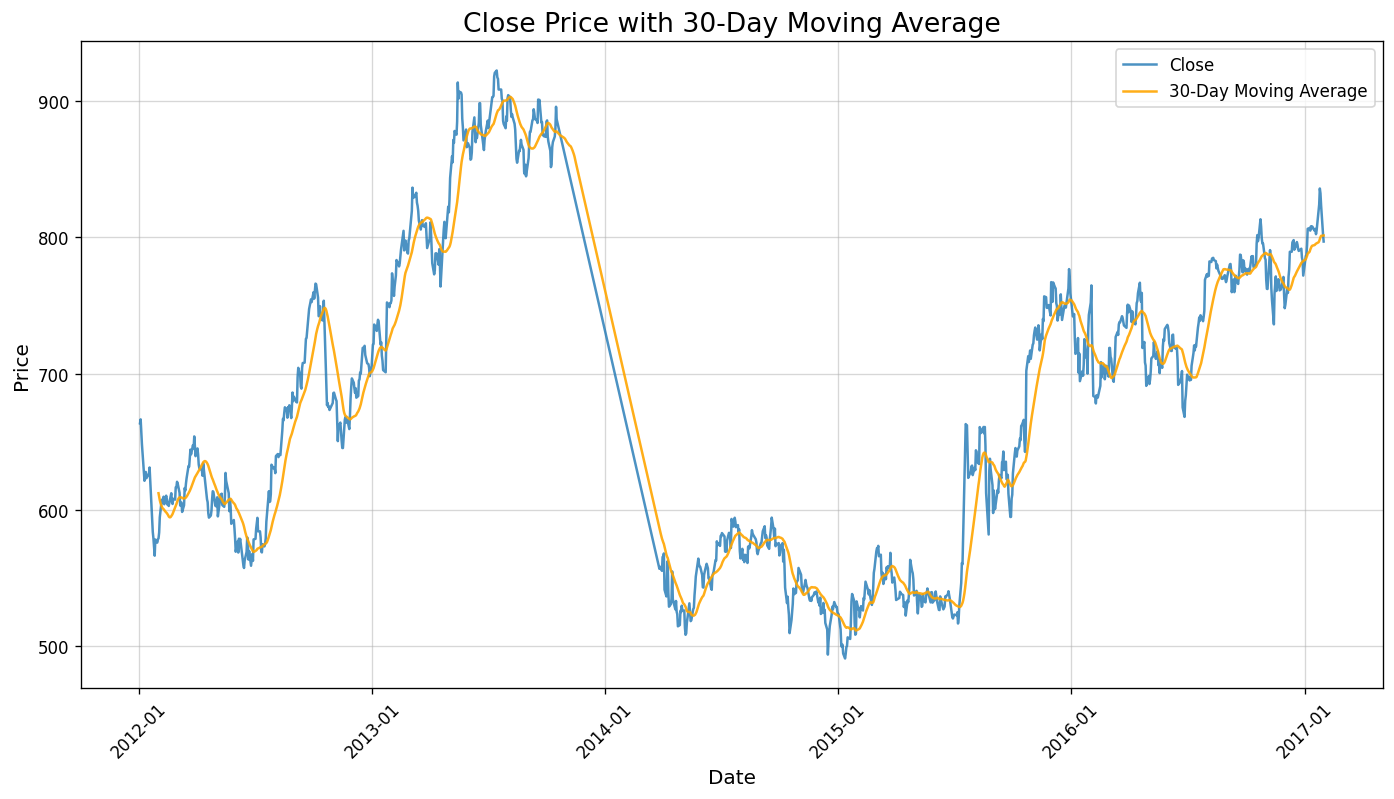

In [ ]:
# This script visualizes stock price trends, volume distribution, correlations, and moving averages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

file_path = "Google_Stock_Price_Combined.csv"
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(14, 7), dpi=120)
plt.plot(data['Date'], data['Open'], label='Open', alpha=0.8, linestyle='--')
plt.plot(data['Date'], data['High'], label='High', alpha=0.8, linestyle='-.')
plt.plot(data['Date'], data['Low'], label='Low', alpha=0.8, linestyle=':')
plt.plot(data['Date'], data['Close'], label='Close', alpha=0.8, linestyle='-')
plt.title('Stock Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45, fontsize=10)
plt.show()

plt.figure(figsize=(12, 6), dpi=120)
sns.histplot(data['Volume'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Volume', fontsize=16)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10, 8), dpi=120)
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features', fontsize=16)
plt.show()

data['MA_30'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(14, 7), dpi=120)
plt.plot(data['Date'], data['Close'], label='Close', alpha=0.8, linestyle='-')
plt.plot(data['Date'], data['MA_30'], label='30-Day Moving Average', color='orange', alpha=0.9)
plt.title('Close Price with 30-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45, fontsize=10)
plt.show()


In [ ]:
# This script detects errors and anomalies in stock price data
import pandas as pd
import numpy as np

file_path = "Google_Stock_Price_Combined.csv"
data = pd.read_csv(file_path)

def detect_high_low_errors(data):
    return data[data['High'] < data['Low']]

def detect_open_close_errors(data):
    return data[(data['Open'] > data['High']) | (data['Open'] < data['Low']) |
                (data['Close'] > data['High']) | (data['Close'] < data['Low'])]

def detect_volume_errors(data, threshold=3):
    mean_vol = data['Volume'].mean()
    std_vol = data['Volume'].std()
    return data[(data['Volume'] < 0) | (data['Volume'] > mean_vol + threshold * std_vol)]

def detect_date_errors(data):
    date_diff = pd.to_datetime(data['Date']).diff().dt.days
    return data.iloc[np.where(date_diff > 1)[0]]

high_low_errors = detect_high_low_errors(data)
open_close_errors = detect_open_close_errors(data)
volume_errors = detect_volume_errors(data)
date_errors = detect_date_errors(data)

print("High-Low Relationship Errors:")
print(high_low_errors)

print("\nOpen-Close Range Errors:")
print(open_close_errors)

print("\nVolume Errors:")
print(volume_errors)

print("\nDate Errors:")
print(date_errors)


High-Low Relationship Errors:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

Open-Close Range Errors:
          Date        Open        High      Low       Close       Volume
0     2012/1/3  325.250000  332.830000  324.970  663.590000  7380500.000
1     2012/1/4  331.270000  333.870000  329.080  666.450000  5749400.000
2     2012/1/5  329.830000  330.750000  326.890  657.210000  6590300.000
3     2012/1/6  328.340000  328.770000  323.680  648.240000  5405900.000
4     2012/1/7  324.680000  325.507500  319.585  641.537500  6260425.000
..         ...         ...         ...      ...         ...          ...
809  2014/3/22  597.226667  598.453333  582.960  567.160745  6326266.667
810  2014/3/23  593.553333  594.346667  576.900  565.114596  6211533.333
811  2014/3/24  589.880000  590.240000  570.840  563.068447  6096800.000
812  2014/3/25  580.820000  582.740000  571.360  561.022298  4838400.000
813  2014/3/26  578.840000  583.600000  563.640  558.976149  517920

In [ ]:
# This script preprocesses stock price data for RNN-based predictions
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date').reset_index(drop=True)
    return data

def feature_engineering(data):
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_30'] = data['Close'].rolling(window=30).mean()
    data['Volatility_10'] = data['Close'].rolling(window=10).std()
    data['Volume_Change_Rate'] = data['Volume'].pct_change()
    data.fillna(method='bfill', inplace=True)
    data.fillna(method='ffill', inplace=True)
    return data

def normalize_data(data, features_to_normalize):
    scaler = MinMaxScaler()
    data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])
    return data, scaler

def create_sliding_window(data, feature_columns, target_column, N, M):
    X, y = [], []
    feature_data = data[feature_columns].values
    target_data = data[target_column].values
    for i in range(len(data) - N - M + 1):
        X.append(feature_data[i:i+N])
        y.append(target_data[i+N:i+N+M])
    return np.array(X), np.array(y)

def save_data_splits(X_train, y_train, X_val, y_val, X_test, y_test, output_dir="data_splits"):
    import os
    os.makedirs(output_dir, exist_ok=True)
    np.savez_compressed(os.path.join(output_dir, "train_data.npz"), X=X_train, y=y_train)
    np.savez_compressed(os.path.join(output_dir, "val_data.npz"), X=X_val, y=y_val)
    np.savez_compressed(os.path.join(output_dir, "test_data.npz"), X=X_test, y=y_test)
    print(f"Data splits saved in directory: {output_dir}")

if __name__ == "__main__":
    file_path = "Google_Stock_Price_Combined.csv"
    data = load_data(file_path)
    data = feature_engineering(data)
    features_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_10', 'MA_30', 'Volatility_10', 'Volume_Change_Rate']
    data, scaler = normalize_data(data, features_to_normalize)
    N = 30
    M = 1
    feature_columns = features_to_normalize
    target_column = 'Close'
    X, y = create_sliding_window(data, feature_columns, target_column, N, M)
    X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)
    print(f"Train set: X={X_train.shape}, y={y_train.shape}")
    print(f"Validation set: X={X_val.shape}, y={y_val.shape}")
    print(f"Test set: X={X_test.shape}, y={y_test.shape}")
    save_data_splits(X_train, y_train, X_val, y_val, X_test, y_test)


Train set: X=(1269, 30, 9), y=(1269, 1)
Validation set: X=(362, 30, 9), y=(362, 1)
Test set: X=(183, 30, 9), y=(183, 1)
Data splits saved in directory: data_splits


C:\Users\32987\AppData\Local\Temp\ipykernel_81216\1474079239.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\32987\AppData\Local\Temp\ipykernel_81216\1474079239.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# This script preprocesses stock price data for RNN-based predictions
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date').reset_index(drop=True)
    return data

def feature_engineering(data):
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_30'] = data['Close'].rolling(window=30).mean()
    data['Volatility_10'] = data['Close'].rolling(window=10).std()
    data['Volume_Change_Rate'] = data['Volume'].pct_change()
    data.fillna(method='bfill', inplace=True)
    data.fillna(method='ffill', inplace=True)
    return data

def normalize_data(data, features_to_normalize):
    scaler = MinMaxScaler()
    data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])
    return data, scaler

def create_sliding_window(data, feature_columns, target_column, N, M):
    X, y = [], []
    feature_data = data[feature_columns].values
    target_data = data[target_column].values
    for i in range(len(data) - N - M + 1):
        X.append(feature_data[i:i+N])
        y.append(target_data[i+N:i+N+M])
    return np.array(X), np.array(y)

def save_data_splits(X_train, y_train, X_val, y_val, X_test, y_test, output_dir="data_splits"):
    import os
    os.makedirs(output_dir, exist_ok=True)
    np.savez_compressed(os.path.join(output_dir, "train_data.npz"), X=X_train, y=y_train)
    np.savez_compressed(os.path.join(output_dir, "val_data.npz"), X=X_val, y=y_val)
    np.savez_compressed(os.path.join(output_dir, "test_data.npz"), X=X_test, y=y_test)
    print(f"Data splits saved in directory: {output_dir}")

if __name__ == "__main__":
    file_path = "Google_Stock_Price_Combined.csv"
    data = load_data(file_path)
    data = feature_engineering(data)
    features_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_10', 'MA_30', 'Volatility_10', 'Volume_Change_Rate']
    data, scaler = normalize_data(data, features_to_normalize)
    N = 30
    M = 1
    feature_columns = features_to_normalize
    target_column = 'Close'
    X, y = create_sliding_window(data, feature_columns, target_column, N, M)
    X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)
    print(f"Train set: X={X_train.shape}, y={y_train.shape}")
    print(f"Validation set: X={X_val.shape}, y={y_val.shape}")
    print(f"Test set: X={X_test.shape}, y={y_test.shape}")
    save_data_splits(X_train, y_train, X_val, y_val, X_test, y_test)


Data loaded successfully!
Feature engineering completed!
Data normalization completed!
Sliding windows created!
Data split into train, validation, and test sets!
Train set: X=(1269, 30, 9), y=(1269, 1)
Validation set: X=(362, 30, 9), y=(362, 1)
Test set: X=(183, 30, 9), y=(183, 1)
Data splits saved in directory: data_splits
Data splits saved successfully!


C:\Users\32987\AppData\Local\Temp\ipykernel_81216\1474079239.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\32987\AppData\Local\Temp\ipykernel_81216\1474079239.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


##  Vanilla RNN 

Epoch 1/100, Train Loss: 0.0233
Epoch 2/100, Train Loss: 0.0022
Epoch 3/100, Train Loss: 0.0015
Epoch 4/100, Train Loss: 0.0012
Epoch 5/100, Train Loss: 0.0010
Epoch 6/100, Train Loss: 0.0009
Epoch 7/100, Train Loss: 0.0008
Epoch 8/100, Train Loss: 0.0007
Epoch 9/100, Train Loss: 0.0006
Epoch 10/100, Train Loss: 0.0006
Epoch 11/100, Train Loss: 0.0006
Epoch 12/100, Train Loss: 0.0005
Epoch 13/100, Train Loss: 0.0005
Epoch 14/100, Train Loss: 0.0005
Epoch 15/100, Train Loss: 0.0005
Epoch 16/100, Train Loss: 0.0005
Epoch 17/100, Train Loss: 0.0004
Epoch 18/100, Train Loss: 0.0004
Epoch 19/100, Train Loss: 0.0004
Epoch 20/100, Train Loss: 0.0004
Epoch 21/100, Train Loss: 0.0004
Epoch 22/100, Train Loss: 0.0004
Epoch 23/100, Train Loss: 0.0004
Epoch 24/100, Train Loss: 0.0004
Epoch 25/100, Train Loss: 0.0004
Epoch 26/100, Train Loss: 0.0004
Epoch 27/100, Train Loss: 0.0004
Epoch 28/100, Train Loss: 0.0004
Epoch 29/100, Train Loss: 0.0003
Epoch 30/100, Train Loss: 0.0003
Epoch 31/100, Train

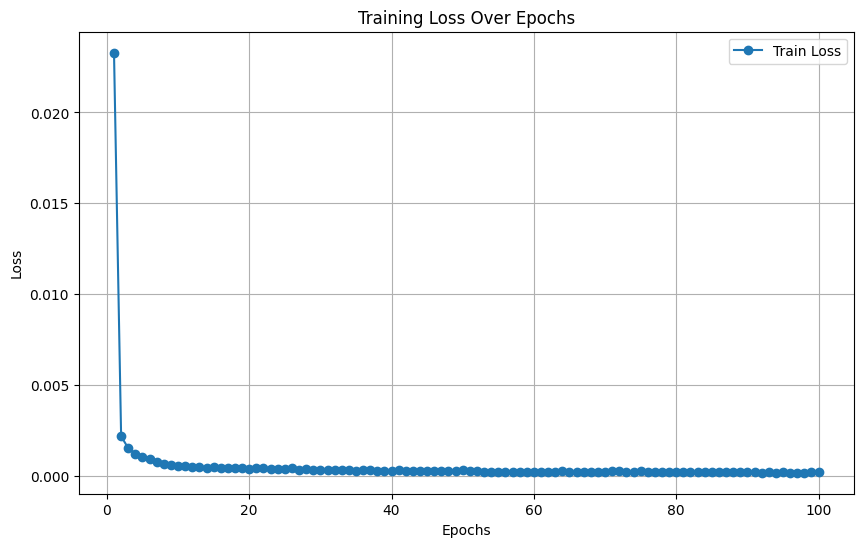

In [ ]:
# This script trains a Vanilla RNN to predict stock prices using PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

input_size = X_train.shape[2]
hidden_size = 50
output_size = 1
batch_size = 32
epochs = 100

train_loader = prepare_dataloader(X_train, y_train, batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VanillaRNN(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, marker='o', label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


Running configuration 1/81: (32, 0.01, 16, 0.1)
Running configuration 2/81: (32, 0.01, 16, 0.2)
Running configuration 3/81: (32, 0.01, 16, 0.3)
Running configuration 4/81: (32, 0.01, 32, 0.1)
Running configuration 5/81: (32, 0.01, 32, 0.2)
Running configuration 6/81: (32, 0.01, 32, 0.3)
Running configuration 7/81: (32, 0.01, 64, 0.1)
Running configuration 8/81: (32, 0.01, 64, 0.2)
Running configuration 9/81: (32, 0.01, 64, 0.3)
Running configuration 10/81: (32, 0.001, 16, 0.1)
Running configuration 11/81: (32, 0.001, 16, 0.2)
Running configuration 12/81: (32, 0.001, 16, 0.3)
Running configuration 13/81: (32, 0.001, 32, 0.1)
Running configuration 14/81: (32, 0.001, 32, 0.2)
Running configuration 15/81: (32, 0.001, 32, 0.3)
Running configuration 16/81: (32, 0.001, 64, 0.1)
Running configuration 17/81: (32, 0.001, 64, 0.2)
Running configuration 18/81: (32, 0.001, 64, 0.3)
Running configuration 19/81: (32, 0.0005, 16, 0.1)
Running configuration 20/81: (32, 0.0005, 16, 0.2)
Running configur

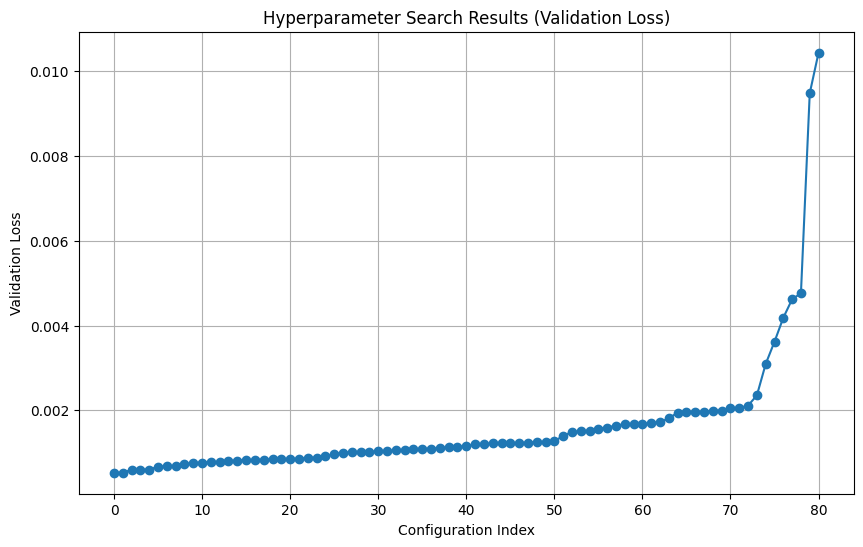

In [ ]:
# This script performs hyperparameter tuning for a Vanilla RNN model using grid search
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

param_grid = {
    'hidden_size': [32, 50, 64],
    'learning_rate': [0.01, 0.001, 0.0005],
    'batch_size': [16, 32, 64],
    'dropout_rate': [0.1, 0.2, 0.3],
}
param_combinations = list(product(*param_grid.values()))

def train_and_evaluate(params):
    hidden_size, learning_rate, batch_size, dropout_rate = params
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    val_loader = prepare_dataloader(X_val, y_val, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = VanillaRNN(X_train.shape[2], hidden_size, 1, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    epochs = 20
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    return val_loss

results = []
for idx, params in enumerate(param_combinations):
    print(f"Running configuration {idx + 1}/{len(param_combinations)}: {params}")
    val_loss = train_and_evaluate(params)
    results.append((params, val_loss))

results = sorted(results, key=lambda x: x[1])
best_params, best_val_loss = results[0]
print(f"Best Parameters: {best_params}, Best Validation Loss: {best_val_loss:.4f}")

losses = [res[1] for res in results]
plt.figure(figsize=(10, 6))
plt.plot(range(len(results)), losses, marker='o')
plt.title("Hyperparameter Search Results (Validation Loss)")
plt.xlabel("Configuration Index")
plt.ylabel("Validation Loss")
plt.grid()
plt.show()


Running configuration 1/81: (32, 0.01, 16, 0.1)
Model saved to best_model.pth
Epoch 1: Train Loss = 0.0119, Validation Loss = 0.0026
Model saved to best_model.pth
Epoch 2: Train Loss = 0.0029, Validation Loss = 0.0017
Model saved to best_model.pth
Epoch 3: Train Loss = 0.0020, Validation Loss = 0.0016
Model saved to best_model.pth
Epoch 4: Train Loss = 0.0021, Validation Loss = 0.0016
Epoch 5: Train Loss = 0.0017, Validation Loss = 0.0020
Model saved to best_model.pth
Epoch 6: Train Loss = 0.0014, Validation Loss = 0.0010
Model saved to best_model.pth
Epoch 7: Train Loss = 0.0011, Validation Loss = 0.0007
Epoch 8: Train Loss = 0.0012, Validation Loss = 0.0012
Model saved to best_model.pth
Epoch 9: Train Loss = 0.0012, Validation Loss = 0.0006
Epoch 10: Train Loss = 0.0011, Validation Loss = 0.0020
Epoch 11: Train Loss = 0.0009, Validation Loss = 0.0014
Epoch 12: Train Loss = 0.0009, Validation Loss = 0.0007
Epoch 13: Train Loss = 0.0010, Validation Loss = 0.0013
Model saved to best_mod

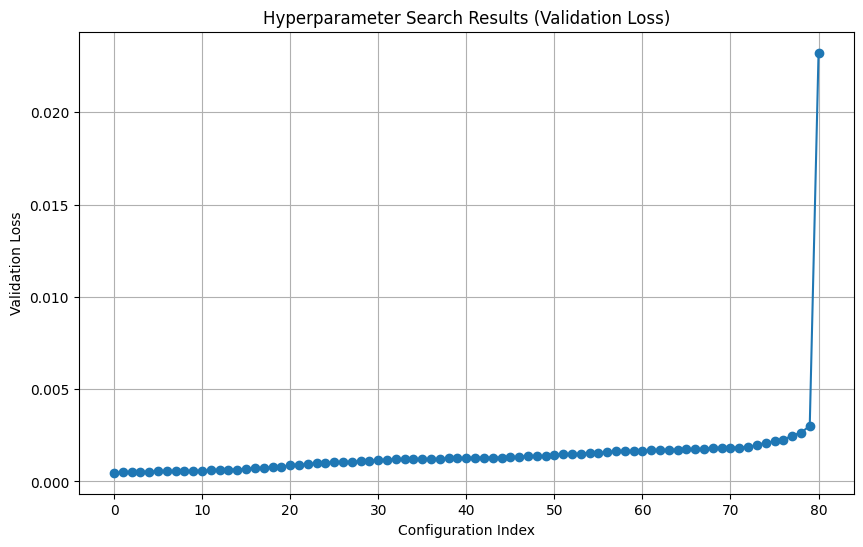

In [ ]:
# This script trains and evaluates a Vanilla RNN model with hyperparameter tuning and model saving
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import time

class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_and_evaluate(params, X_train, y_train, X_val, y_val):
    hidden_size, learning_rate, batch_size, dropout_rate = params
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    val_loader = prepare_dataloader(X_val, y_val, batch_size)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = VanillaRNN(X_train.shape[2], hidden_size, 1, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_val_loss = float('inf')
    for epoch in range(20):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        scheduler.step()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            try:
                save_path = "best_model.pth"
                torch.save(model.state_dict(), save_path)
                print(f"Model saved to {save_path}")
            except Exception as e:
                print(f"Failed to save model: {e}")
                save_path = str(Path.home() / f"best_model_{int(time.time())}.pth")
                torch.save(model.state_dict(), save_path)
                print(f"Model saved to {save_path}")

        print(f"Epoch {epoch + 1}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

    return best_val_loss

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]

    val_data = np.load("data_splits/val_data.npz")
    X_val, y_val = val_data["X"], val_data["y"]

    param_grid = {
        'hidden_size': [32, 50, 64],
        'learning_rate': [0.01, 0.001, 0.0005],
        'batch_size': [16, 32, 64],
        'dropout_rate': [0.1, 0.2, 0.3],
    }
    param_combinations = list(product(*param_grid.values()))

    results = []
    for idx, params in enumerate(param_combinations):
        print(f"Running configuration {idx + 1}/{len(param_combinations)}: {params}")
        val_loss = train_and_evaluate(params, X_train, y_train, X_val, y_val)
        results.append((params, val_loss))

    results = sorted(results, key=lambda x: x[1])
    best_params, best_val_loss = results[0]
    print(f"Best Parameters: {best_params}, Best Validation Loss: {best_val_loss:.4f}")

    losses = [res[1] for res in results]
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(results)), losses, marker='o')
    plt.title("Hyperparameter Search Results (Validation Loss)")
    plt.xlabel("Configuration Index")
    plt.ylabel("Validation Loss")
    plt.grid()
    plt.show()


## GRU

Epoch 1/20, Train Loss: 0.0657
Epoch 2/20, Train Loss: 0.0041
Epoch 3/20, Train Loss: 0.0034
Epoch 4/20, Train Loss: 0.0030
Epoch 5/20, Train Loss: 0.0027
Epoch 6/20, Train Loss: 0.0027
Epoch 7/20, Train Loss: 0.0026
Epoch 8/20, Train Loss: 0.0022
Epoch 9/20, Train Loss: 0.0023
Epoch 10/20, Train Loss: 0.0022
Epoch 11/20, Train Loss: 0.0022
Epoch 12/20, Train Loss: 0.0020
Epoch 13/20, Train Loss: 0.0018
Epoch 14/20, Train Loss: 0.0019
Epoch 15/20, Train Loss: 0.0017
Epoch 16/20, Train Loss: 0.0017
Epoch 17/20, Train Loss: 0.0016
Epoch 18/20, Train Loss: 0.0016
Epoch 19/20, Train Loss: 0.0016
Epoch 20/20, Train Loss: 0.0015


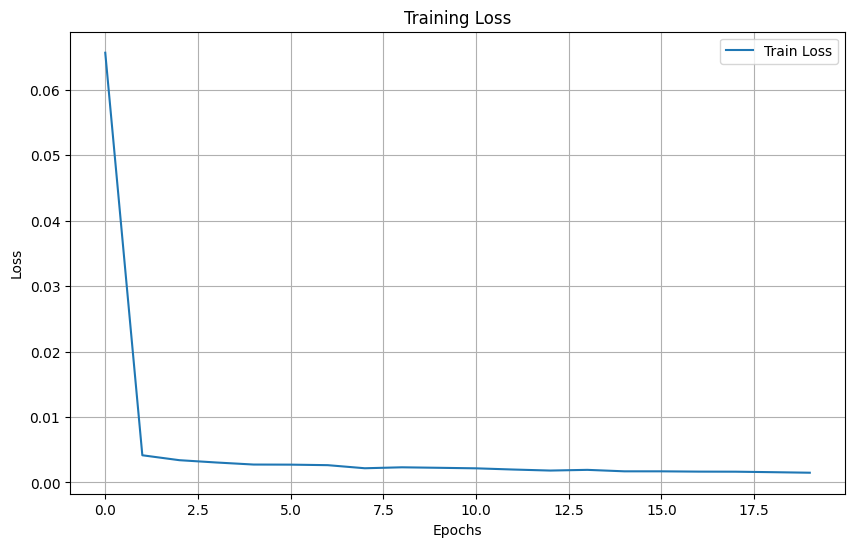

In [ ]:
# This script trains a GRU model to predict stock prices without validation
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_gru_no_validation(X_train, y_train, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs):
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GRUModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_losses, label="Train Loss")
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    return model

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]

    input_size = X_train.shape[2]
    hidden_size = 64
    output_size = 1
    dropout_rate = 0.2
    learning_rate = 0.001
    batch_size = 32
    epochs = 20

    model = train_gru_no_validation(X_train, y_train, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs)


Running configuration 1/162: (32, 0.01, 16, 0.1, 'Adam')
Running configuration 2/162: (32, 0.01, 16, 0.1, 'SGD')
Running configuration 3/162: (32, 0.01, 16, 0.2, 'Adam')
Running configuration 4/162: (32, 0.01, 16, 0.2, 'SGD')
Running configuration 5/162: (32, 0.01, 16, 0.3, 'Adam')
Running configuration 6/162: (32, 0.01, 16, 0.3, 'SGD')
Running configuration 7/162: (32, 0.01, 32, 0.1, 'Adam')
Running configuration 8/162: (32, 0.01, 32, 0.1, 'SGD')
Running configuration 9/162: (32, 0.01, 32, 0.2, 'Adam')
Running configuration 10/162: (32, 0.01, 32, 0.2, 'SGD')
Running configuration 11/162: (32, 0.01, 32, 0.3, 'Adam')
Running configuration 12/162: (32, 0.01, 32, 0.3, 'SGD')
Running configuration 13/162: (32, 0.01, 64, 0.1, 'Adam')
Running configuration 14/162: (32, 0.01, 64, 0.1, 'SGD')
Running configuration 15/162: (32, 0.01, 64, 0.2, 'Adam')
Running configuration 16/162: (32, 0.01, 64, 0.2, 'SGD')
Running configuration 17/162: (32, 0.01, 64, 0.3, 'Adam')
Running configuration 18/162: (

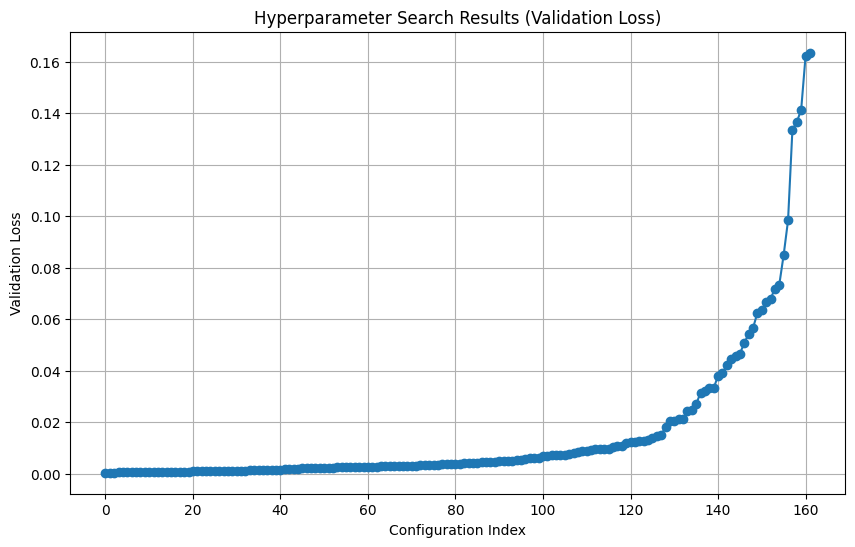

In [ ]:
# This script performs hyperparameter tuning for a GRU model to predict stock prices
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_and_evaluate(params, X_train, y_train, X_val, y_val, input_size, output_size, epochs):
    hidden_size, learning_rate, batch_size, dropout_rate, optimizer_type = params
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    val_loader = prepare_dataloader(X_val, y_val, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GRUModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) if optimizer_type == 'Adam' else optim.SGD(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        scheduler.step()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    return val_loss

def hyperparameter_search(X_train, y_train, X_val, y_val, input_size, output_size, epochs):
    param_grid = {
        'hidden_size': [32, 64, 128],
        'learning_rate': [0.01, 0.001, 0.0005],
        'batch_size': [16, 32, 64],
        'dropout_rate': [0.1, 0.2, 0.3],
        'optimizer_type': ['Adam', 'SGD'],
    }
    param_combinations = list(product(*param_grid.values()))
    results = []
    for idx, params in enumerate(param_combinations):
        print(f"Running configuration {idx + 1}/{len(param_combinations)}: {params}")
        val_loss = train_and_evaluate(params, X_train, y_train, X_val, y_val, input_size, output_size, epochs)
        results.append((params, val_loss))
    results = sorted(results, key=lambda x: x[1])
    best_params, best_val_loss = results[0]
    print(f"Best Parameters: {best_params}, Best Validation Loss: {best_val_loss:.4f}")
    losses = [res[1] for res in results]
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(results)), losses, marker='o')
    plt.title("Hyperparameter Search Results (Validation Loss)")
    plt.xlabel("Configuration Index")
    plt.ylabel("Validation Loss")
    plt.grid()
    plt.show()
    return best_params, best_val_loss

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]
    val_data = np.load("data_splits/val_data.npz")
    X_val, y_val = val_data["X"], val_data["y"]
    input_size = X_train.shape[2]
    output_size = 1
    epochs = 20
    best_params, best_val_loss = hyperparameter_search(X_train, y_train, X_val, y_val, input_size, output_size, epochs)


Training with best configuration...
Epoch 1/50, Train Loss: 0.0212, Validation Loss: 0.0032
Epoch 2/50, Train Loss: 0.0019, Validation Loss: 0.0013
Epoch 3/50, Train Loss: 0.0016, Validation Loss: 0.0013
Epoch 4/50, Train Loss: 0.0018, Validation Loss: 0.0009
Epoch 5/50, Train Loss: 0.0013, Validation Loss: 0.0008
Epoch 6/50, Train Loss: 0.0013, Validation Loss: 0.0097
Epoch 7/50, Train Loss: 0.0019, Validation Loss: 0.0030
Epoch 8/50, Train Loss: 0.0011, Validation Loss: 0.0013
Epoch 9/50, Train Loss: 0.0011, Validation Loss: 0.0008
Epoch 10/50, Train Loss: 0.0011, Validation Loss: 0.0006
Epoch 11/50, Train Loss: 0.0013, Validation Loss: 0.0006
Epoch 12/50, Train Loss: 0.0009, Validation Loss: 0.0008
Epoch 13/50, Train Loss: 0.0008, Validation Loss: 0.0017
Epoch 14/50, Train Loss: 0.0008, Validation Loss: 0.0018
Epoch 15/50, Train Loss: 0.0009, Validation Loss: 0.0006
Epoch 16/50, Train Loss: 0.0008, Validation Loss: 0.0006
Epoch 17/50, Train Loss: 0.0011, Validation Loss: 0.0013
Epoc

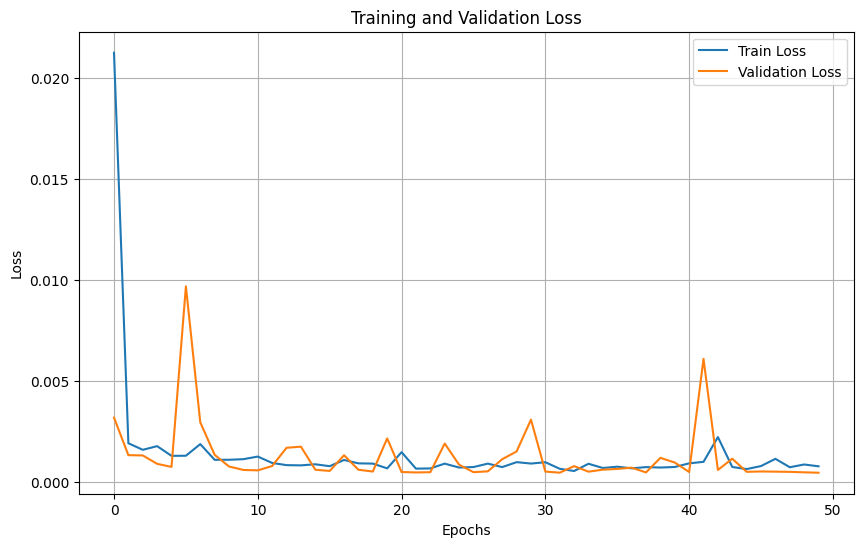

Best Validation Loss: 0.0005
Fine-tuning with Learning Rate: 0.008, Dropout Rate: 0.15
Epoch 1/50, Train Loss: 0.0080, Validation Loss: 0.0035
Epoch 2/50, Train Loss: 0.0017, Validation Loss: 0.0012
Epoch 3/50, Train Loss: 0.0014, Validation Loss: 0.0011
Epoch 4/50, Train Loss: 0.0014, Validation Loss: 0.0007
Epoch 5/50, Train Loss: 0.0010, Validation Loss: 0.0007
Epoch 6/50, Train Loss: 0.0008, Validation Loss: 0.0016
Epoch 7/50, Train Loss: 0.0011, Validation Loss: 0.0016
Epoch 8/50, Train Loss: 0.0010, Validation Loss: 0.0009
Epoch 9/50, Train Loss: 0.0009, Validation Loss: 0.0011
Epoch 10/50, Train Loss: 0.0010, Validation Loss: 0.0012
Epoch 11/50, Train Loss: 0.0007, Validation Loss: 0.0005
Epoch 12/50, Train Loss: 0.0008, Validation Loss: 0.0004
Epoch 13/50, Train Loss: 0.0009, Validation Loss: 0.0006
Epoch 14/50, Train Loss: 0.0006, Validation Loss: 0.0005
Epoch 15/50, Train Loss: 0.0007, Validation Loss: 0.0005
Epoch 16/50, Train Loss: 0.0006, Validation Loss: 0.0008
Epoch 17/5

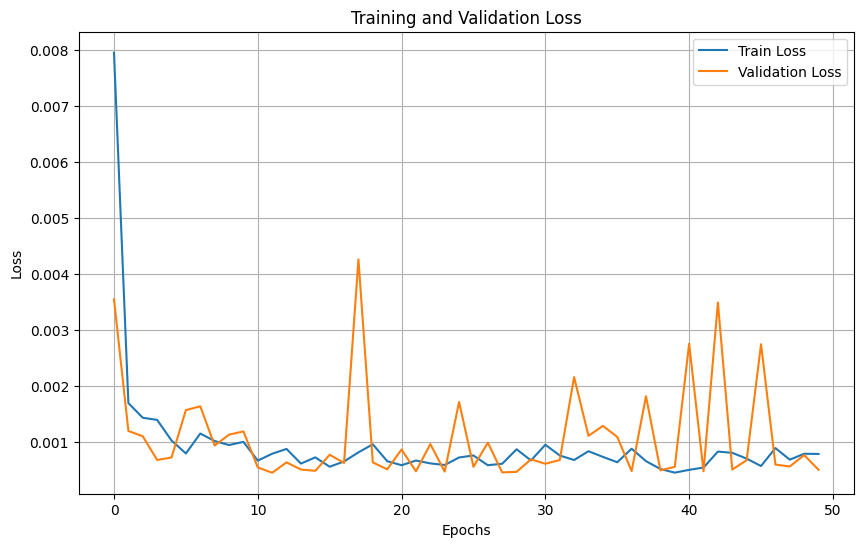

Validation Loss for Learning Rate: 0.008, Dropout Rate: 0.15: 0.0004
Fine-tuning with Learning Rate: 0.008, Dropout Rate: 0.25
Epoch 1/50, Train Loss: 0.0151, Validation Loss: 0.0017
Epoch 2/50, Train Loss: 0.0025, Validation Loss: 0.0042
Epoch 3/50, Train Loss: 0.0017, Validation Loss: 0.0012
Epoch 4/50, Train Loss: 0.0015, Validation Loss: 0.0015
Epoch 5/50, Train Loss: 0.0015, Validation Loss: 0.0022
Epoch 6/50, Train Loss: 0.0011, Validation Loss: 0.0031
Epoch 7/50, Train Loss: 0.0014, Validation Loss: 0.0008
Epoch 8/50, Train Loss: 0.0011, Validation Loss: 0.0018
Epoch 9/50, Train Loss: 0.0011, Validation Loss: 0.0024
Epoch 10/50, Train Loss: 0.0012, Validation Loss: 0.0008
Epoch 11/50, Train Loss: 0.0011, Validation Loss: 0.0012
Epoch 12/50, Train Loss: 0.0010, Validation Loss: 0.0005
Epoch 13/50, Train Loss: 0.0011, Validation Loss: 0.0006
Epoch 14/50, Train Loss: 0.0013, Validation Loss: 0.0012
Epoch 15/50, Train Loss: 0.0010, Validation Loss: 0.0008
Epoch 16/50, Train Loss: 0.

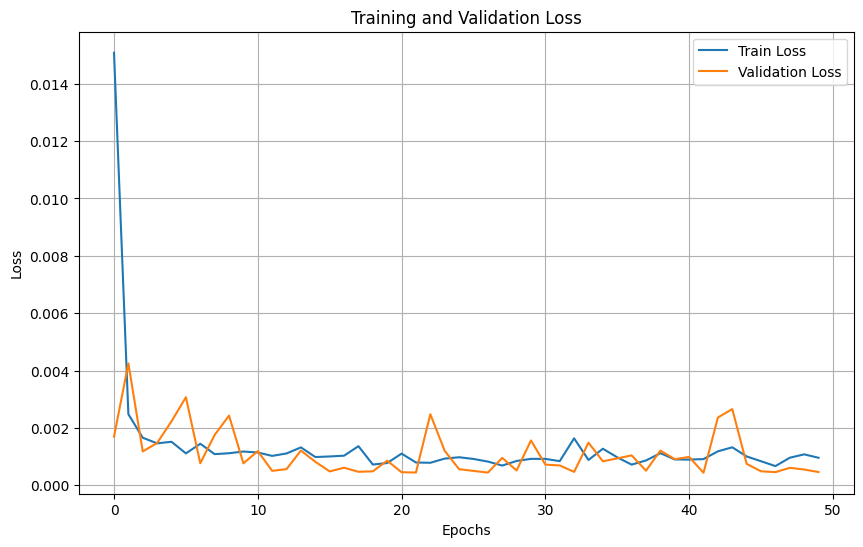

Validation Loss for Learning Rate: 0.008, Dropout Rate: 0.25: 0.0004
Fine-tuning with Learning Rate: 0.012, Dropout Rate: 0.15
Epoch 1/50, Train Loss: 0.0134, Validation Loss: 0.0014
Epoch 2/50, Train Loss: 0.0016, Validation Loss: 0.0015
Epoch 3/50, Train Loss: 0.0015, Validation Loss: 0.0037
Epoch 4/50, Train Loss: 0.0014, Validation Loss: 0.0053
Epoch 5/50, Train Loss: 0.0014, Validation Loss: 0.0035
Epoch 6/50, Train Loss: 0.0010, Validation Loss: 0.0007
Epoch 7/50, Train Loss: 0.0010, Validation Loss: 0.0005
Epoch 8/50, Train Loss: 0.0012, Validation Loss: 0.0060
Epoch 9/50, Train Loss: 0.0016, Validation Loss: 0.0014
Epoch 10/50, Train Loss: 0.0008, Validation Loss: 0.0019
Epoch 11/50, Train Loss: 0.0012, Validation Loss: 0.0014
Epoch 12/50, Train Loss: 0.0009, Validation Loss: 0.0005
Epoch 13/50, Train Loss: 0.0008, Validation Loss: 0.0015
Epoch 14/50, Train Loss: 0.0009, Validation Loss: 0.0006
Epoch 15/50, Train Loss: 0.0007, Validation Loss: 0.0006
Epoch 16/50, Train Loss: 0.

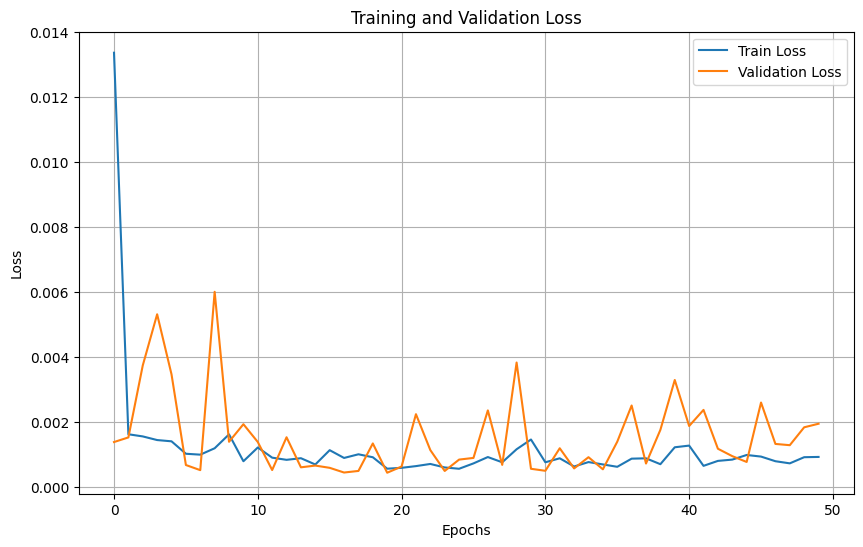

Validation Loss for Learning Rate: 0.012, Dropout Rate: 0.15: 0.0004
Fine-tuning with Learning Rate: 0.012, Dropout Rate: 0.25
Epoch 1/50, Train Loss: 0.0097, Validation Loss: 0.0022
Epoch 2/50, Train Loss: 0.0018, Validation Loss: 0.0012
Epoch 3/50, Train Loss: 0.0019, Validation Loss: 0.0041
Epoch 4/50, Train Loss: 0.0020, Validation Loss: 0.0020
Epoch 5/50, Train Loss: 0.0017, Validation Loss: 0.0007
Epoch 6/50, Train Loss: 0.0015, Validation Loss: 0.0013
Epoch 7/50, Train Loss: 0.0012, Validation Loss: 0.0006
Epoch 8/50, Train Loss: 0.0012, Validation Loss: 0.0008
Epoch 9/50, Train Loss: 0.0022, Validation Loss: 0.0005
Epoch 10/50, Train Loss: 0.0012, Validation Loss: 0.0022
Epoch 11/50, Train Loss: 0.0013, Validation Loss: 0.0005
Epoch 12/50, Train Loss: 0.0009, Validation Loss: 0.0013
Epoch 13/50, Train Loss: 0.0009, Validation Loss: 0.0006
Epoch 14/50, Train Loss: 0.0009, Validation Loss: 0.0004
Epoch 15/50, Train Loss: 0.0011, Validation Loss: 0.0015
Epoch 16/50, Train Loss: 0.

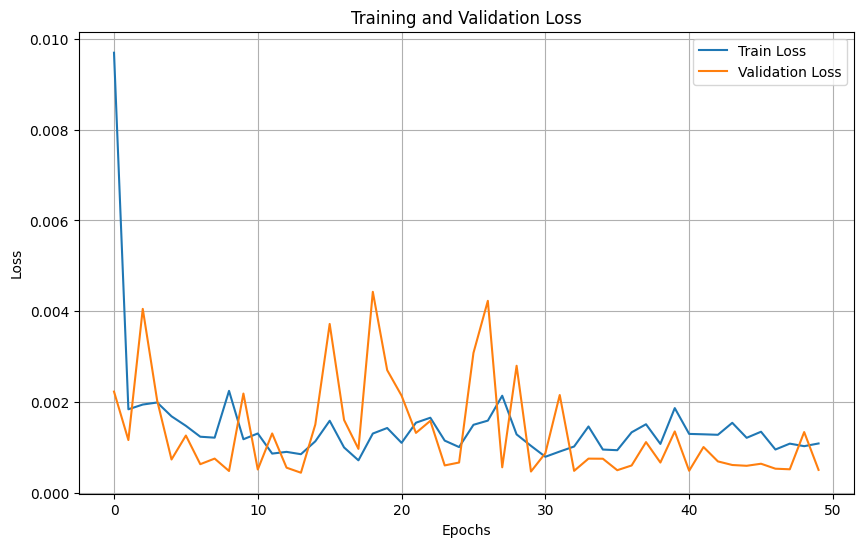

Validation Loss for Learning Rate: 0.012, Dropout Rate: 0.25: 0.0004


In [ ]:
# This script trains and fine-tunes a GRU model for stock price prediction
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import os

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_model(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs, save_path):
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    val_loader = prepare_dataloader(X_val, y_val, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GRUModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), save_path)
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_losses, label="Train Loss")
    plt.plot(range(epochs), val_losses, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()
    return best_val_loss

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]
    val_data = np.load("data_splits/val_data.npz")
    X_val, y_val = val_data["X"], val_data["y"]
    input_size = X_train.shape[2]
    hidden_size = 128
    output_size = 1
    dropout_rate = 0.2
    learning_rate = 0.01
    batch_size = 16
    epochs = 50
    best_model_path = "best_gru_model.pth"
    print("Training with best configuration...")
    best_val_loss = train_model(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs, best_model_path)
    print(f"Best Validation Loss: {best_val_loss:.4f}")
    fine_tune_configs = [
        (0.008, 0.15),
        (0.008, 0.25),
        (0.012, 0.15),
        (0.012, 0.25)
    ]
    for lr, dr in fine_tune_configs:
        print(f"Fine-tuning with Learning Rate: {lr}, Dropout Rate: {dr}")
        fine_tune_model_path = f"fine_tuned_gru_lr{lr}_dr{dr}.pth"
        val_loss = train_model(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, dr, lr, batch_size, epochs, fine_tune_model_path)
        print(f"Validation Loss for Learning Rate: {lr}, Dropout Rate: {dr}: {val_loss:.4f}")


Epoch 1/50, Train Loss: 0.1261, Validation Loss: 0.0068
Epoch 2/50, Train Loss: 0.0207, Validation Loss: 0.0068
Epoch 3/50, Train Loss: 0.0153, Validation Loss: 0.0026
Epoch 4/50, Train Loss: 0.0094, Validation Loss: 0.0011
Epoch 5/50, Train Loss: 0.0107, Validation Loss: 0.0021
Epoch 6/50, Train Loss: 0.0077, Validation Loss: 0.0070
Epoch 7/50, Train Loss: 0.0086, Validation Loss: 0.0015
Epoch 8/50, Train Loss: 0.0089, Validation Loss: 0.0019
Epoch 9/50, Train Loss: 0.0067, Validation Loss: 0.0010
Epoch 10/50, Train Loss: 0.0072, Validation Loss: 0.0011
Epoch 11/50, Train Loss: 0.0071, Validation Loss: 0.0011
Epoch 12/50, Train Loss: 0.0061, Validation Loss: 0.0027
Epoch 13/50, Train Loss: 0.0072, Validation Loss: 0.0019
Epoch 14/50, Train Loss: 0.0096, Validation Loss: 0.0017
Epoch 15/50, Train Loss: 0.0087, Validation Loss: 0.0018
Epoch 16/50, Train Loss: 0.0102, Validation Loss: 0.0041
Epoch 17/50, Train Loss: 0.0093, Validation Loss: 0.0012
Epoch 18/50, Train Loss: 0.0108, Validat

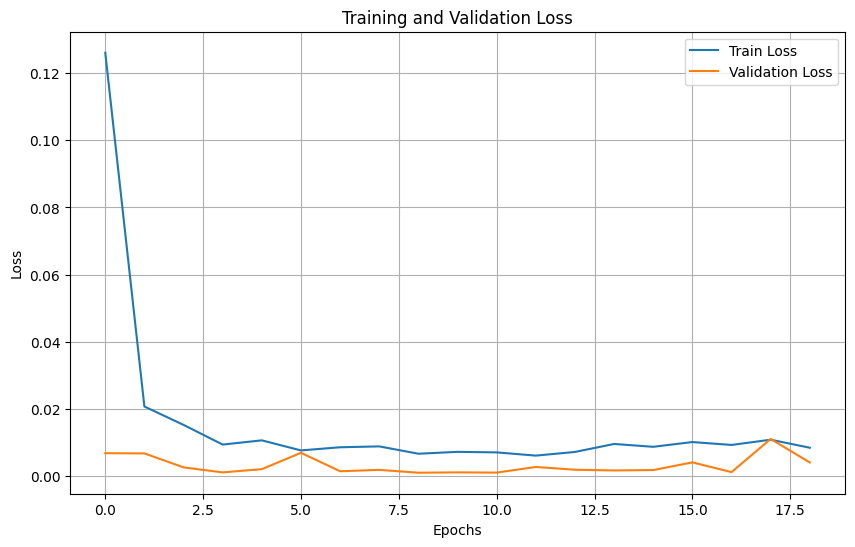

Model saved as best_gru_model_stable.pth


In [ ]:
# This script trains an improved GRU model with batch normalization, early stopping, and a cosine annealing scheduler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

class GRUModelImproved(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(GRUModelImproved, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.batch_norm(out[:, -1, :])
        out = self.dropout(out)
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_with_stability(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs):
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    val_loader = prepare_dataloader(X_val, y_val, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GRUModelImproved(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
    best_val_loss = float('inf')
    patience = 10
    no_improve_count = 0
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        scheduler.step()
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve_count = 0
            torch.save(model.state_dict(), "best_gru_model_stable.pth")
        else:
            no_improve_count += 1
            if no_improve_count >= patience:
                print("Early stopping triggered.")
                break
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()
    print("Model saved as best_gru_model_stable.pth")
    return model

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]
    val_data = np.load("data_splits/val_data.npz")
    X_val, y_val = val_data["X"], val_data["y"]
    input_size = X_train.shape[2]
    hidden_size = 128
    output_size = 1
    dropout_rate = 0.15
    learning_rate = 0.008
    batch_size = 16
    epochs = 50
    model = train_with_stability(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs)


## LSTM

Epoch 1/20, Train Loss: 0.0584
Epoch 2/20, Train Loss: 0.0039
Epoch 3/20, Train Loss: 0.0030
Epoch 4/20, Train Loss: 0.0033
Epoch 5/20, Train Loss: 0.0024
Epoch 6/20, Train Loss: 0.0025
Epoch 7/20, Train Loss: 0.0024
Epoch 8/20, Train Loss: 0.0022
Epoch 9/20, Train Loss: 0.0020
Epoch 10/20, Train Loss: 0.0019
Epoch 11/20, Train Loss: 0.0019
Epoch 12/20, Train Loss: 0.0017
Epoch 13/20, Train Loss: 0.0020
Epoch 14/20, Train Loss: 0.0017
Epoch 15/20, Train Loss: 0.0016
Epoch 16/20, Train Loss: 0.0016
Epoch 17/20, Train Loss: 0.0015
Epoch 18/20, Train Loss: 0.0014
Epoch 19/20, Train Loss: 0.0015
Epoch 20/20, Train Loss: 0.0014


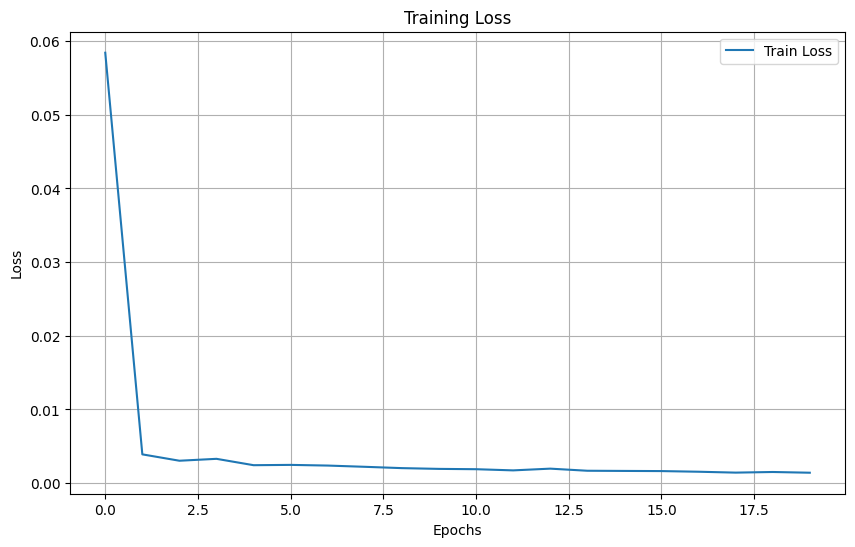

In [ ]:
# This script trains an LSTM model for stock price prediction
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_lstm(X_train, y_train, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs):
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}")
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()
    return model

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]
    input_size = X_train.shape[2]
    hidden_size = 128
    output_size = 1
    dropout_rate = 0.2
    learning_rate = 0.001
    batch_size = 32
    epochs = 20
    model = train_lstm(X_train, y_train, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs)


Epoch 1/20, Train Loss: 0.0542
Epoch 2/20, Train Loss: 0.0044
Epoch 3/20, Train Loss: 0.0029
Epoch 4/20, Train Loss: 0.0022
Epoch 5/20, Train Loss: 0.0023
Epoch 6/20, Train Loss: 0.0021
Epoch 7/20, Train Loss: 0.0020
Epoch 8/20, Train Loss: 0.0020
Epoch 9/20, Train Loss: 0.0020
Epoch 10/20, Train Loss: 0.0018
Epoch 11/20, Train Loss: 0.0018
Epoch 12/20, Train Loss: 0.0015
Epoch 13/20, Train Loss: 0.0016
Epoch 14/20, Train Loss: 0.0015
Epoch 15/20, Train Loss: 0.0015
Epoch 16/20, Train Loss: 0.0015
Epoch 17/20, Train Loss: 0.0016
Epoch 18/20, Train Loss: 0.0013
Epoch 19/20, Train Loss: 0.0014
Epoch 20/20, Train Loss: 0.0013


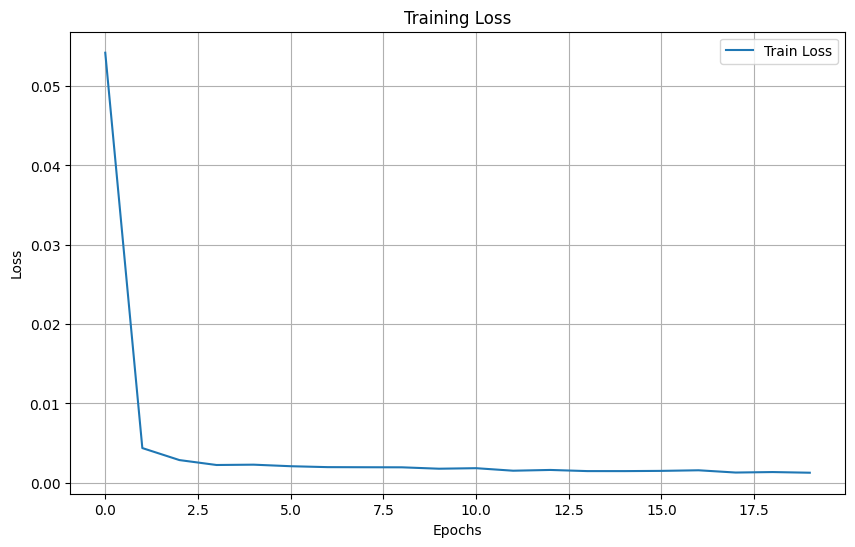

In [ ]:
# This script trains an LSTM model for stock price prediction
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_lstm(X_train, y_train, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs):
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}")
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()
    return model

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]
    input_size = X_train.shape[2]
    hidden_size = 128
    output_size = 1
    dropout_rate = 0.2
    learning_rate = 0.001
    batch_size = 32
    epochs = 20
    model = train_lstm(X_train, y_train, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs)


Running configuration 1/81: (64, 0.01, 16, 0.1)
Epoch 1/20, Train Loss: 0.0117, Validation Loss: 0.0034
Epoch 2/20, Train Loss: 0.0022, Validation Loss: 0.0017
Epoch 3/20, Train Loss: 0.0014, Validation Loss: 0.0022
Epoch 4/20, Train Loss: 0.0013, Validation Loss: 0.0026
Epoch 5/20, Train Loss: 0.0016, Validation Loss: 0.0033
Epoch 6/20, Train Loss: 0.0014, Validation Loss: 0.0017
Epoch 7/20, Train Loss: 0.0011, Validation Loss: 0.0012
Epoch 8/20, Train Loss: 0.0015, Validation Loss: 0.0009
Epoch 9/20, Train Loss: 0.0010, Validation Loss: 0.0014
Epoch 10/20, Train Loss: 0.0009, Validation Loss: 0.0008
Epoch 11/20, Train Loss: 0.0007, Validation Loss: 0.0008
Epoch 12/20, Train Loss: 0.0008, Validation Loss: 0.0008
Epoch 13/20, Train Loss: 0.0008, Validation Loss: 0.0018
Epoch 14/20, Train Loss: 0.0007, Validation Loss: 0.0013
Epoch 15/20, Train Loss: 0.0007, Validation Loss: 0.0012
Epoch 16/20, Train Loss: 0.0006, Validation Loss: 0.0011
Epoch 17/20, Train Loss: 0.0006, Validation Loss:

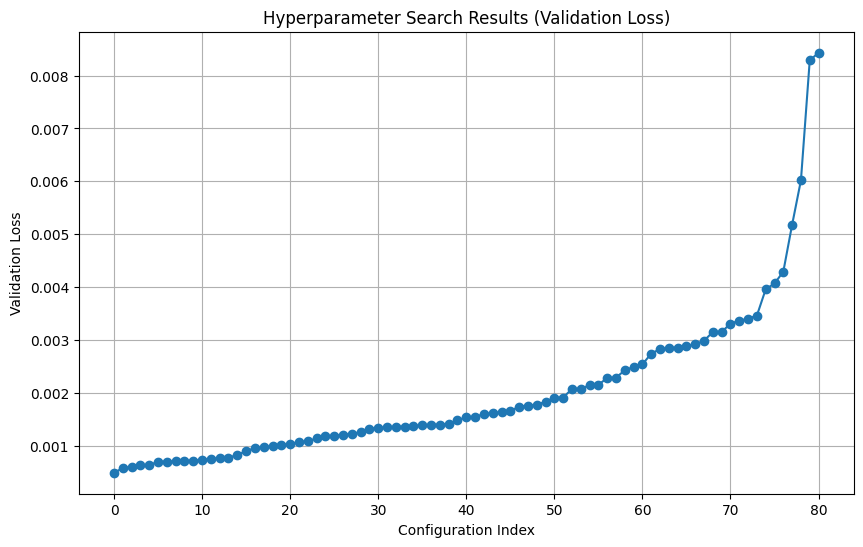

In [ ]:
# This script performs hyperparameter tuning for an LSTM model to predict stock prices
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_and_evaluate_lstm(params, X_train, y_train, X_val, y_val, input_size, output_size, epochs):
    hidden_size, learning_rate, batch_size, dropout_rate = params
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    val_loader = prepare_dataloader(X_val, y_val, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    best_val_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    return best_val_loss

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]
    val_data = np.load("data_splits/val_data.npz")
    X_val, y_val = val_data["X"], val_data["y"]
    param_grid = {
        'hidden_size': [64, 128, 256],
        'learning_rate': [0.01, 0.001, 0.0005],
        'batch_size': [16, 32, 64],
        'dropout_rate': [0.1, 0.2, 0.3],
    }
    param_combinations = list(product(*param_grid.values()))
    results = []
    input_size = X_train.shape[2]
    output_size = 1
    epochs = 20
    for idx, params in enumerate(param_combinations):
        print(f"Running configuration {idx + 1}/{len(param_combinations)}: {params}")
        val_loss = train_and_evaluate_lstm(params, X_train, y_train, X_val, y_val, input_size, output_size, epochs)
        results.append((params, val_loss))
    results = sorted(results, key=lambda x: x[1])
    best_params, best_val_loss = results[0]
    print(f"Best Parameters: {best_params}, Best Validation Loss: {best_val_loss:.4f}")
    losses = [res[1] for res in results]
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(results)), losses, marker='o')
    plt.title("Hyperparameter Search Results (Validation Loss)")
    plt.xlabel("Configuration Index")
    plt.ylabel("Validation Loss")
    plt.grid()
    plt.show()


Epoch 1/50, Train Loss: 0.0100, Validation Loss: 0.0020
Epoch 2/50, Train Loss: 0.0021, Validation Loss: 0.0028
Epoch 3/50, Train Loss: 0.0019, Validation Loss: 0.0061
Epoch 4/50, Train Loss: 0.0016, Validation Loss: 0.0012
Epoch 5/50, Train Loss: 0.0014, Validation Loss: 0.0011
Epoch 6/50, Train Loss: 0.0014, Validation Loss: 0.0016
Epoch 7/50, Train Loss: 0.0010, Validation Loss: 0.0009
Epoch 8/50, Train Loss: 0.0008, Validation Loss: 0.0008
Epoch 9/50, Train Loss: 0.0010, Validation Loss: 0.0010
Epoch 10/50, Train Loss: 0.0010, Validation Loss: 0.0018
Epoch 11/50, Train Loss: 0.0008, Validation Loss: 0.0008
Epoch 12/50, Train Loss: 0.0006, Validation Loss: 0.0006
Epoch 13/50, Train Loss: 0.0006, Validation Loss: 0.0010
Epoch 14/50, Train Loss: 0.0006, Validation Loss: 0.0007
Epoch 15/50, Train Loss: 0.0008, Validation Loss: 0.0010
Epoch 16/50, Train Loss: 0.0007, Validation Loss: 0.0006
Epoch 17/50, Train Loss: 0.0006, Validation Loss: 0.0007
Epoch 18/50, Train Loss: 0.0006, Validat

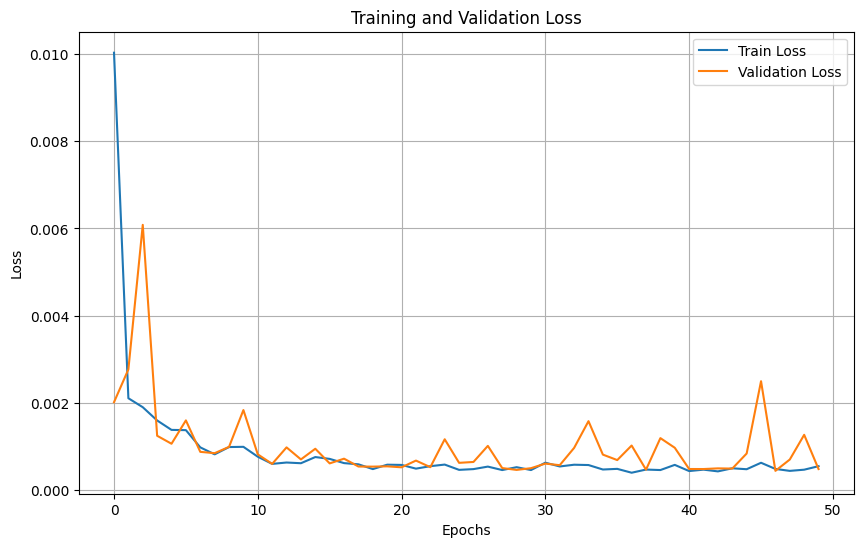

In [ ]:
# This script trains an LSTM model with validation using the best hyperparameters
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def prepare_dataloader(X, y, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def train_lstm_with_validation(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs):
    train_loader = prepare_dataloader(X_train, y_train, batch_size)
    val_loader = prepare_dataloader(X_val, y_val, batch_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_losses, label="Train Loss")
    plt.plot(range(epochs), val_losses, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()
    return model

if __name__ == "__main__":
    train_data = np.load("data_splits/train_data.npz")
    X_train, y_train = train_data["X"], train_data["y"]
    val_data = np.load("data_splits/val_data.npz")
    X_val, y_val = val_data["X"], val_data["y"]
    best_params = (64, 0.01, 16, 0.1)
    hidden_size, learning_rate, batch_size, dropout_rate = best_params
    input_size = X_train.shape[2]
    output_size = 1
    epochs = 50
    model = train_lstm_with_validation(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, dropout_rate, learning_rate, batch_size, epochs)


In [17]:
# Save the trained model
torch.save(model.state_dict(), "best_lstm_model.pth")
print("Model saved as 'best_lstm_model.pth'")


Model saved as 'best_lstm_model.pth'


## testing module

Evaluating Best RNN Model...
Test Loss (MSE): 0.0017, Test MSE: 0.0017, R² Score: 0.0047


C:\Users\32987\AppData\Local\Temp\ipykernel_20700\2768451766.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d

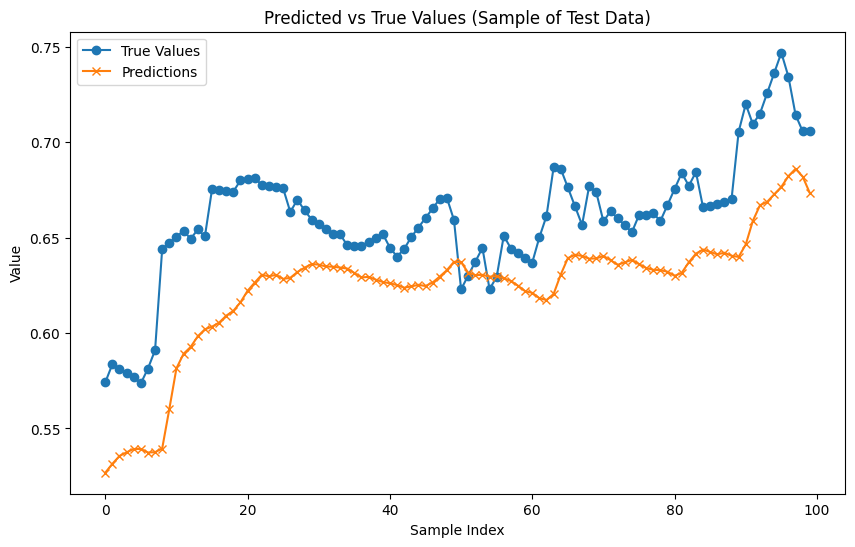

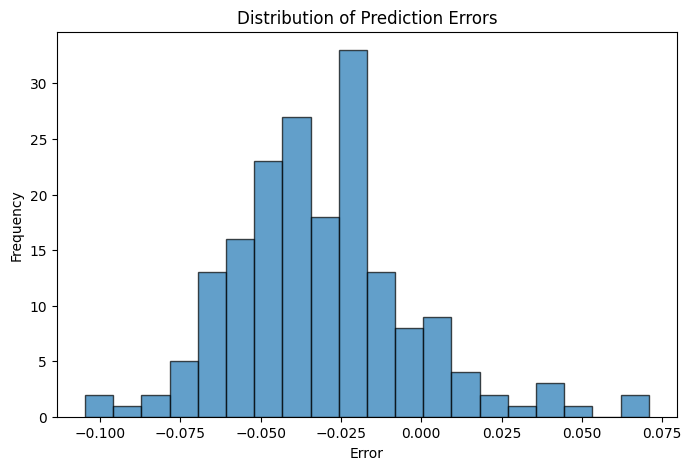

Best RNN Model: Test Loss = 0.0017


In [ ]:
# This script evaluates a saved RNN model on test data and visualizes its performance
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

def load_test_data(file_path):
    test_data = np.load(file_path)
    X_test = test_data["X"]
    y_test = test_data["y"]
    return X_test, y_test

def evaluate_model(model_path, X_test, y_test, input_size, hidden_size, output_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = RNNModel(input_size, hidden_size, output_size).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    criterion = nn.MSELoss()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_loss = criterion(predictions, y_test_tensor).item()
        predictions = predictions.cpu().numpy()
        y_test = y_test_tensor.cpu().numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
    print(f"Test Loss (MSE): {test_loss:.4f}, Test MSE: {mse:.4f}, R² Score: {r2:.4f}")
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[:100], label='True Values', marker='o')
    plt.plot(predictions[:100], label='Predictions', marker='x')
    plt.legend()
    plt.title("Predicted vs True Values (Sample of Test Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.show()
    errors = predictions - y_test
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()
    return test_loss, predictions

if __name__ == "__main__":
    test_data_path = "C:\\Users\\32987\\OneDrive\\文档\\DLF\\Assoigment3\\重做 2.0\\data_splits\\test_data.npz"
    rnn_model_path = "best_model_RNN.pth"
    X_test, y_test = load_test_data(test_data_path)
    input_size = X_test.shape[2]
    output_size = 1
    hidden_size = 64
    print("Evaluating Best RNN Model...")
    test_loss, predictions = evaluate_model(
        rnn_model_path, X_test, y_test, input_size, hidden_size, output_size
    )
    print(f"Best RNN Model: Test Loss = {test_loss:.4f}")


C:\Users\32987\AppData\Local\Temp\ipykernel_20700\1453227705.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d

Test Loss (MSE): 0.0062, Test MSE: 0.0062, R² Score: -2.6040


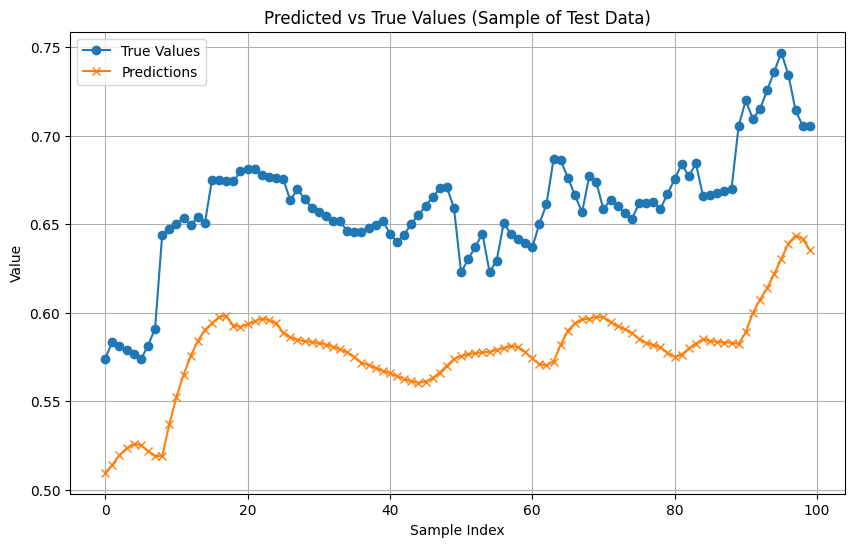

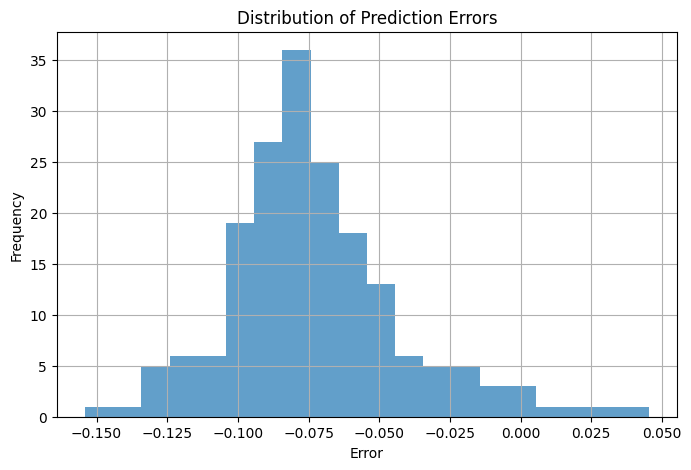

In [ ]:
# This script evaluates a saved GRU model with Batch Normalization on test data
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_size)  # Batch normalization layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = out[:, -1, :]
        out = self.batch_norm(out)
        out = self.dropout(out)
        out = self.fc(out)
        return out

def load_test_data(file_path):
    test_data = np.load(file_path)
    X_test = test_data["X"]
    y_test = test_data["y"]
    return X_test, y_test

def evaluate_gru_model(model_path, X_test, y_test, input_size, hidden_size, output_size, dropout_rate):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GRUModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    criterion = nn.MSELoss()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_loss = criterion(predictions, y_test_tensor).item()
        predictions = predictions.cpu().numpy()
        y_test = y_test_tensor.cpu().numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
    print(f"Test Loss (MSE): {test_loss:.4f}, Test MSE: {mse:.4f}, R² Score: {r2:.4f}")
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[:100], label="True Values", marker='o')
    plt.plot(predictions[:100], label="Predictions", marker='x')
    plt.title("Predicted vs True Values (Sample of Test Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()
    errors = predictions - y_test
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=20, alpha=0.7)
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()
    return test_loss, mse, r2

if __name__ == "__main__":
    test_data_path = "C:/Users/32987/OneDrive/文档/DLF/Assoigment3/重做 2.0/data_splits/test_data.npz"
    gru_model_path = "best_gru_model.pth"
    X_test, y_test = load_test_data(test_data_path)
    input_size = X_test.shape[2]
    hidden_size = 128
    output_size = 1
    dropout_rate = 0.2
    evaluate_gru_model(gru_model_path, X_test, y_test, input_size, hidden_size, output_size, dropout_rate)


Test Loss (MSE): 0.0005, Test MSE: 0.0005, R² Score: 0.7323
LSTM Model: Test Loss = 0.0005, MSE = 0.0005, R² = 0.7323


C:\Users\32987\AppData\Local\Temp\ipykernel_20700\92019040.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=dev

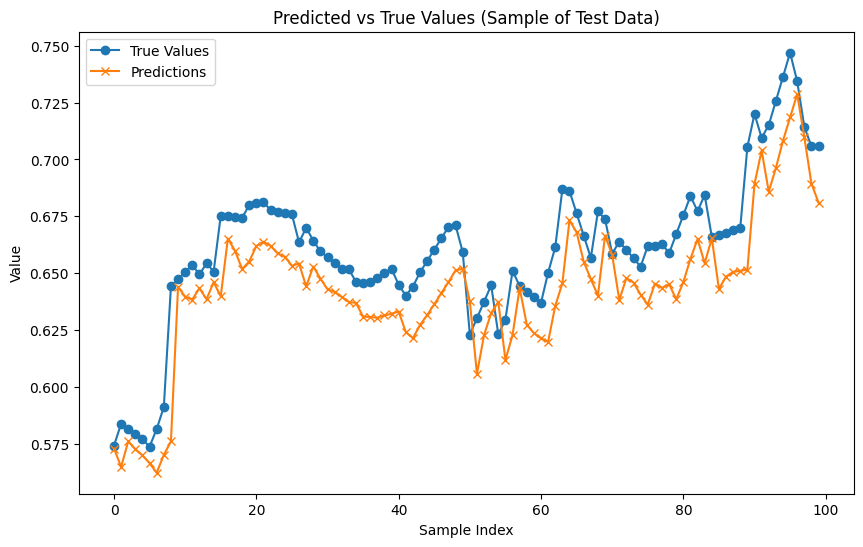

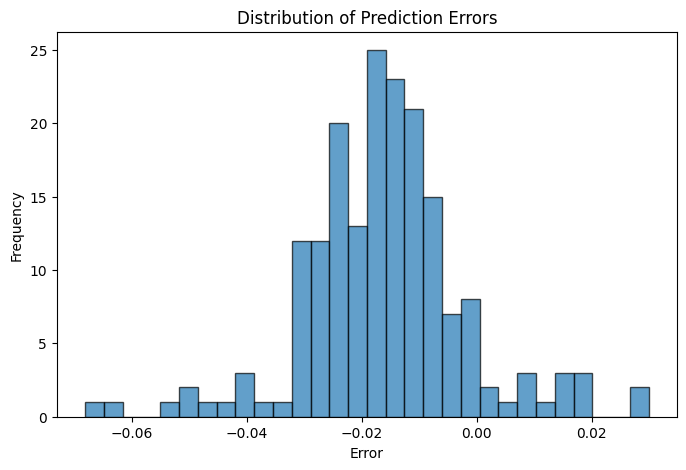

In [ ]:
# This script evaluates a saved LSTM model on test data and visualizes its performance
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def load_test_data(file_path):
    test_data = np.load(file_path)
    X_test = test_data["X"]
    y_test = test_data["y"]
    return X_test, y_test

def evaluate_lstm_model(model_path, X_test, y_test, input_size, hidden_size, output_size, dropout_rate):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMModel(input_size, hidden_size, output_size, dropout_rate).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    criterion = nn.MSELoss()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_loss = criterion(predictions, y_test_tensor).item()
        predictions = predictions.cpu().numpy()
        y_test = y_test_tensor.cpu().numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
    print(f"Test Loss (MSE): {test_loss:.4f}, Test MSE: {mse:.4f}, R² Score: {r2:.4f}")
    return test_loss, mse, r2, predictions

def plot_results(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true[:100], label="True Values", marker="o")
    plt.plot(y_pred[:100], label="Predictions", marker="x")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.title("Predicted vs True Values (Sample of Test Data)")
    plt.legend()
    plt.show()
    errors = y_pred - y_true
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=30, edgecolor="k", alpha=0.7)
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

if __name__ == "__main__":
    test_data_path = "C:/Users/32987/OneDrive/文档/DLF/Assoigment3/重做 2.0/data_splits/test_data.npz"
    lstm_model_path = "best_lstm_model.pth"
    X_test, y_test = load_test_data(test_data_path)
    input_size = X_test.shape[2]
    output_size = 1
    hidden_size = 64
    dropout_rate = 0.1
    test_loss, mse, r2, predictions = evaluate_lstm_model(
        lstm_model_path, X_test, y_test, input_size, hidden_size, output_size, dropout_rate
    )
    print(f"LSTM Model: Test Loss = {test_loss:.4f}, MSE = {mse:.4f}, R² = {r2:.4f}")
    plot_results(y_test, predictions)
